## Welcome to the first-ever (and hopefully last-ever) remote ADA final exam (Fall 2020)

In [1]:
import sys
import os
# print( sys.exec_prefix.split(os.sep) )
try:
    assert 'adaexam' in os.environ['CONDA_DEFAULT_ENV']
#     assert 'adaexam' in sys.executable
except AssertionError:
    print('Seems the adaexam conda environment is not your active environment!')
    raise
sys.executable
print(f'Python path: {sys.executable}')

Python path: /Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8


In [2]:
print(sys.executable)

/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8


In [3]:
print(os.environ['CONDA_DEFAULT_ENV'])

adaexam


In [4]:
''' Package import test '''
import os
import gzip
import random
import pickle
import re
import itertools
import collections
import operator
import requests
from urllib.parse import *
from datetime import *
from dateutil.parser import parse

import math
import sklearn
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import *

import ast
import gensim
import string
import nltk
import codecs
import vaderSentiment
import spacy
from empath import Empath
from bs4 import BeautifulSoup

import networkx as nx

import pyspark
import pyspark.sql
from pyspark import SparkContext

from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

print("Package import test successful!")

Package import test successful!


In [6]:
#read data
pokemon = pd.read_csv('pokemon.csv')

In [7]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [8]:
combats = pd.read_csv('combats.csv')

In [9]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


(6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [10]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [11]:
combats.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


Text(0, 0.5, 'number')

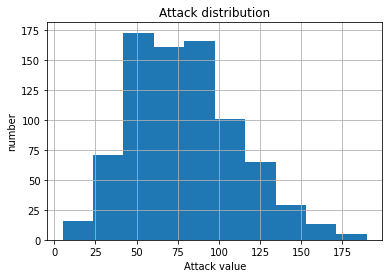

In [17]:
pokemon.Attack.hist()
plt.title('Attack distribution')
plt.xlabel("Attack value")
plt.ylabel("number")

Text(0, 0.5, 'number')

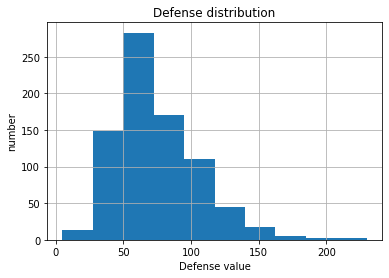

In [19]:
pokemon.Defense.hist()
plt.title('Defense distribution')
plt.xlabel("Defense value")
plt.ylabel("number")

We can see from the defense and Attack distribution that, the attack value is mostly distributed among 50-100, while the defense value is mostly distributed among 50-70.

In [28]:
pd.concat([pokemon['Class 1'],pokemon['Class 2']]).value_counts()

Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Electric     50
Dragon       50
Steel        49
Ghost        46
Fairy        40
Ice          38
dtype: int64

In [29]:
pd.concat([pokemon['Class 1'],pokemon['Class 2']]).unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying', nan], dtype=object)

Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
visualize the relation between these two variables using an appropriate plot;
list the names of the 3 Pokémon with highest attack-over-defense ratio;
list the names of the 3 Pokémon with lowest attack-over-defense ratio;
list the names of the 10 Pokémon with the largest number of victories.

Text(3.674999999999997, 0.5, 'Defence value')

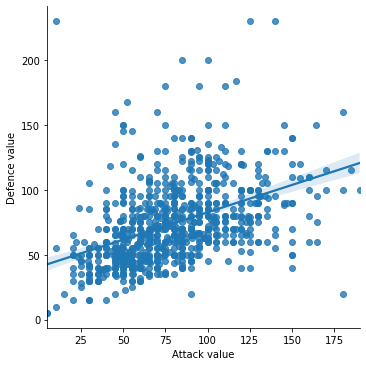

In [31]:
# visualize the relation between these two variables using an appropriate plot
import seaborn as sn

pokemon_compare = pokemon[['Attack','Defense']]
sn.lmplot('Attack','Defense', data=pokemon_compare)
plt.xlabel("Attack value")
plt.ylabel("Defence value")

In [37]:
# list the names of the 3 Pokémon with highest attack-over-defense ratio;
pokemon_attack_defense=pokemon.copy()
pokemon_attack_defense['attack_over_defense']=pokemon_attack_defense['Attack']/pokemon_attack_defense['Defense']
pokemon_attack_defense.sort_values(ascending=[False], by=['attack_over_defense'])[:3]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True,9.00
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,False,4.50
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.75


So we can see the highest is DeoxysAttack Forme

In [38]:
# list the names of the 3 Pokémon with lowest attack-over-defense ratio;
pokemon_attack_defense.sort_values(ascending=[True], by=['attack_over_defense'])[:3]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False,0.043478
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,False,0.181818
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,0.279070


In [75]:
# list the names of the 10 Pokémon with the largest number of victories.
# pokemon_attack_defense.sort_values(ascending=[True], by=['attack_over_defense'])[:10]

In [45]:
ids=combats['Winner'].value_counts()[:10]
ids

163    152
154    136
438    136
428    134
432    133
314    133
214    130
394    130
249    128
155    127
Name: Winner, dtype: int64

In [74]:
for i, v in ids.items():
    for index, row in pokemon_attack_defense[pokemon_attack_defense['pid']==i].iterrows():
        print(row['Name'],'wins',v,' games')

Mewtwo wins 152  games
Aerodactyl wins 136  games
Infernape wins 136  games
Jirachi wins 134  games
Deoxys Speed Forme wins 133  games
Slaking wins 133  games
Murkrow wins 130  games
Mega Absol wins 130  games
Mega Houndoom wins 128  games
Mega Aerodactyl wins 127  games


Professor Oak suspects that Pokémon in the grass class have a stronger regular attack than those in the rock class. Check if he is right and convince him of your conclusion with statistical arguments. Note: If there are Pokémon that are in both classes, discard them. Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [87]:
# First let us compare the mean of grass and rock class
grass_group=pokemon_attack_defense[(pokemon_attack_defense['Class 1']=='Grass')|(pokemon_attack_defense['Class 2']=='Grass')]
grass_group.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False,0.909091


In [96]:
rock_group=pokemon_attack_defense[(pokemon_attack_defense['Class 1']=='Rock')|(pokemon_attack_defense['Class 2']=='Rock')]
rock_group.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False,0.800000
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False,0.826087
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False,0.923077
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False,0.281250
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False,0.894737


In [92]:
rock_group[(rock_group['Class 1']=='Rock')&(rock_group['Class 2']=='Grass')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
377,378,Lileep,Rock,Grass,66,41,77,61,87,23,False,0.532468
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False,0.835052


In [93]:
rock_group[(rock_group['Class 1']=='Grass')&(rock_group['Class 2']=='Rock')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense


In [97]:
rock_group=rock_group.drop(index=[377, 378])

In [100]:
grass_group=grass_group.drop(index=[377, 378])

In [104]:
grass_group

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...
783,784,Pumpkaboo Super Size,Ghost,Grass,59,66,70,44,55,41,False,0.942857
784,785,Gourgeist Average Size,Ghost,Grass,65,90,122,58,75,84,False,0.737705
785,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False,0.696721
786,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,False,0.778689


In [102]:
grass_group['Attack'].mean()

73.73118279569893

In [103]:
rock_group['Attack'].mean()

91.78571428571429

In [105]:
stats.ttest_ind(grass_group['Attack'], rock_group['Attack'])

Ttest_indResult(statistic=-3.729457582692065, pvalue=0.00027333381459902653)

p is not less than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories. Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called pokemon and combats, with the same schema as the small CSV files you’ve been working with above.

In [ ]:
# victory_list = combats.groupBy("Winner").agg(count("*").alias("WinnerCount")).sort(desc("WinnerCount"))
# victory_list[:10].show()

In [ ]:
combats_joined = combats.join(pokemon, combats.Winner == pokemon.pid)

all_winners=combats.rdd.map(lambda row: (row.Winner, 1))
winners_counts_rdd = all_winners.reduceByKey(lambda a, b: a+b).sortBy(lambda r: -r[1])
winners_counts_with_schema = winners_counts_rdd.map(lambda r: Row(Winner=r[0], WinnerCount=r[1]))
locations_counts = spark.createDataFrame(winners_counts_with_schema)
winners_counts_with_schema['Name'][:10].show()

## Question 2: Prediction - 40 points

In [107]:
# (3 points) Generate the feature vectors and the labels to train your model.

In [119]:
def generate_label(x):
    if(x==0):
        return 1
    else:
        return 0

In [113]:
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [117]:
#first
combats_label=combats.copy()
combats_label['label']=combats_label['Winner']-combats_label['First_pokemon']

In [120]:
combats_label['label']=combats_label['label'].apply(lambda x: generate_label(x))

In [162]:
combats_train=combats_label.copy()
combats_train.columns=['pid','Second_pokemon','Winner','label']
combats_train

,pid,Second_pokemon,Winner,label
0,266,298,298,0
1,702,701,701,0
2,191,668,668,0
3,237,683,683,0
4,151,231,151,1
...,...,...,...,...
49995,707,126,707,1
49996,589,664,589,1
49997,303,368,368,0
49998,109,89,109,1


In [163]:
combats_train=pd.merge(combats_train,pokemon_attack_defense,how='left',on=["pid"],right_index=False)
combats_train
# preprocessed_data_filtered_percount=pd.merge(recurrent_characters,preprocessed_data_filtered_count,how='inner',on=["character"],right_index=True)

,pid,Second_pokemon,Winner,label,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
0,266,298,298,0,Larvitar,Rock,Ground,50,64,50,45,50,41,False,1.280000
1,702,701,701,0,Virizion,Grass,Fighting,91,90,72,90,129,108,True,1.250000
2,191,668,668,0,Togetic,Fairy,Flying,55,40,85,80,105,40,False,0.470588
3,237,683,683,0,Slugma,Fire,NaN,40,40,40,70,40,20,False,1.000000
4,151,231,151,1,Omastar,Rock,Water,70,60,125,115,70,55,False,0.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,1,Reshiram,Dragon,Fire,100,120,100,150,120,90,True,1.200000
49996,589,664,589,1,Drilbur,Ground,NaN,60,85,40,30,45,68,False,2.125000
49997,303,368,368,0,Pelipper,Water,Flying,60,50,100,85,70,65,False,0.500000
49998,109,89,109,1,Voltorb,Electric,NaN,40,30,50,55,55,100,False,0.600000


In [164]:
combats_train.columns=['f_id','pid','Winner','label','one_Name','one_class1','one_class2','one_HP','one_Attack','one_Defense','one_SPAtk','one_SPDef','one_speed','one_legendary','one_attack_over_defense']

In [165]:
combats_train

,f_id,pid,Winner,label,one_Name,one_class1,one_class2,one_HP,one_Attack,one_Defense,one_SPAtk,one_SPDef,one_speed,one_legendary,one_attack_over_defense
0,266,298,298,0,Larvitar,Rock,Ground,50,64,50,45,50,41,False,1.280000
1,702,701,701,0,Virizion,Grass,Fighting,91,90,72,90,129,108,True,1.250000
2,191,668,668,0,Togetic,Fairy,Flying,55,40,85,80,105,40,False,0.470588
3,237,683,683,0,Slugma,Fire,NaN,40,40,40,70,40,20,False,1.000000
4,151,231,151,1,Omastar,Rock,Water,70,60,125,115,70,55,False,0.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,1,Reshiram,Dragon,Fire,100,120,100,150,120,90,True,1.200000
49996,589,664,589,1,Drilbur,Ground,NaN,60,85,40,30,45,68,False,2.125000
49997,303,368,368,0,Pelipper,Water,Flying,60,50,100,85,70,65,False,0.500000
49998,109,89,109,1,Voltorb,Electric,NaN,40,30,50,55,55,100,False,0.600000


In [149]:
pokemon_attack_defense

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,1.209302
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,0.666667
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,1.454545
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,1.833333
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,2.666667


In [166]:
combats_train=pd.merge(combats_train,pokemon_attack_defense,how='left',on=["pid"],right_index=False)
combats_train

,f_id,pid,Winner,label,one_Name,one_class1,one_class2,one_HP,one_Attack,one_Defense,...,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
0,266,298,298,0,Larvitar,Rock,Ground,50,64,50,...,Grass,Dark,70,70,40,60,40,60,False,1.750000
1,702,701,701,0,Virizion,Grass,Fighting,91,90,72,...,Rock,Fighting,91,129,90,72,90,108,True,1.433333
2,191,668,668,0,Togetic,Fairy,Flying,55,40,85,...,Psychic,NaN,75,75,75,125,95,40,False,1.000000
3,237,683,683,0,Slugma,Fire,NaN,40,40,40,...,Dragon,NaN,77,120,90,60,90,48,False,1.333333
4,151,231,151,1,Omastar,Rock,Water,70,60,125,...,Bug,Rock,20,10,230,10,230,5,False,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,1,Reshiram,Dragon,Fire,100,120,100,...,Water,NaN,30,40,70,70,25,60,False,0.571429
49996,589,664,589,1,Drilbur,Ground,NaN,60,85,40,...,Electric,NaN,35,55,40,45,40,60,False,1.375000
49997,303,368,368,0,Pelipper,Water,Flying,60,50,100,...,Normal,NaN,73,115,60,60,60,90,False,1.916667
49998,109,89,109,1,Voltorb,Electric,NaN,40,30,50,...,Electric,Steel,25,35,70,95,55,45,False,0.500000


In [168]:
combats_train.columns=['f_id', 's_id', 'Winner', 'label', 'one_Name', 'one_class1',
       'one_class2', 'one_HP', 'one_Attack', 'one_Defense', 'one_SPAtk',
       'one_SPDef', 'one_speed', 'one_legendary', 'one_attack_over_defense',
       'two_Name', 'two_Class 1', 'two_Class 2', 'two_HP', 'two_Attack', 'two_Defense', 'two_Sp. Atk',
       'two_Sp. Def', 'two_Speed', 'two_Legendary', 'two_attack_over_defense']

In [174]:
combats_train

,f_id,s_id,Winner,label,one_Name,one_class1,one_class2,one_HP,one_Attack,one_Defense,...,two_Class 1,two_Class 2,two_HP,two_Attack,two_Defense,two_Sp. Atk,two_Sp. Def,two_Speed,two_Legendary,two_attack_over_defense
0,266,298,298,0,Larvitar,Rock,Ground,50,64,50,...,Grass,Dark,70,70,40,60,40,60,False,1.750000
1,702,701,701,0,Virizion,Grass,Fighting,91,90,72,...,Rock,Fighting,91,129,90,72,90,108,True,1.433333
2,191,668,668,0,Togetic,Fairy,Flying,55,40,85,...,Psychic,NaN,75,75,75,125,95,40,False,1.000000
3,237,683,683,0,Slugma,Fire,NaN,40,40,40,...,Dragon,NaN,77,120,90,60,90,48,False,1.333333
4,151,231,151,1,Omastar,Rock,Water,70,60,125,...,Bug,Rock,20,10,230,10,230,5,False,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,1,Reshiram,Dragon,Fire,100,120,100,...,Water,NaN,30,40,70,70,25,60,False,0.571429
49996,589,664,589,1,Drilbur,Ground,NaN,60,85,40,...,Electric,NaN,35,55,40,45,40,60,False,1.375000
49997,303,368,368,0,Pelipper,Water,Flying,60,50,100,...,Normal,NaN,73,115,60,60,60,90,False,1.916667
49998,109,89,109,1,Voltorb,Electric,NaN,40,30,50,...,Electric,Steel,25,35,70,95,55,45,False,0.500000


In [177]:
combats_train=combats_train.drop(['f_id','s_id','Winner','one_Name','two_Name'],axis=1)

In [178]:
combats_train

,label,one_class1,one_class2,one_HP,one_Attack,one_Defense,one_SPAtk,one_SPDef,one_speed,one_legendary,...,two_Class 1,two_Class 2,two_HP,two_Attack,two_Defense,two_Sp. Atk,two_Sp. Def,two_Speed,two_Legendary,two_attack_over_defense
0,0,Rock,Ground,50,64,50,45,50,41,False,...,Grass,Dark,70,70,40,60,40,60,False,1.750000
1,0,Grass,Fighting,91,90,72,90,129,108,True,...,Rock,Fighting,91,129,90,72,90,108,True,1.433333
2,0,Fairy,Flying,55,40,85,80,105,40,False,...,Psychic,NaN,75,75,75,125,95,40,False,1.000000
3,0,Fire,NaN,40,40,40,70,40,20,False,...,Dragon,NaN,77,120,90,60,90,48,False,1.333333
4,1,Rock,Water,70,60,125,115,70,55,False,...,Bug,Rock,20,10,230,10,230,5,False,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,Dragon,Fire,100,120,100,150,120,90,True,...,Water,NaN,30,40,70,70,25,60,False,0.571429
49996,1,Ground,NaN,60,85,40,30,45,68,False,...,Electric,NaN,35,55,40,45,40,60,False,1.375000
49997,0,Water,Flying,60,50,100,85,70,65,False,...,Normal,NaN,73,115,60,60,60,90,False,1.916667
49998,1,Electric,NaN,40,30,50,55,55,100,False,...,Electric,Steel,25,35,70,95,55,45,False,0.500000


In [181]:
# dummy_features = ['one_class1', 'one_class2', 'two_class1', 'two_class2']
X = pd.get_dummies(combats_train.drop(['label'],axis=1))

In [182]:
X

,one_HP,one_Attack,one_Defense,one_SPAtk,one_SPDef,one_speed,one_legendary,one_attack_over_defense,two_HP,two_Attack,...,two_Class 2_Ghost,two_Class 2_Grass,two_Class 2_Ground,two_Class 2_Ice,two_Class 2_Normal,two_Class 2_Poison,two_Class 2_Psychic,two_Class 2_Rock,two_Class 2_Steel,two_Class 2_Water
0,50,64,50,45,50,41,False,1.280000,70,70,...,0,0,0,0,0,0,0,0,0,0
1,91,90,72,90,129,108,True,1.250000,91,129,...,0,0,0,0,0,0,0,0,0,0
2,55,40,85,80,105,40,False,0.470588,75,75,...,0,0,0,0,0,0,0,0,0,0
3,40,40,40,70,40,20,False,1.000000,77,120,...,0,0,0,0,0,0,0,0,0,0
4,70,60,125,115,70,55,False,0.480000,20,10,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,True,1.200000,30,40,...,0,0,0,0,0,0,0,0,0,0
49996,60,85,40,30,45,68,False,2.125000,35,55,...,0,0,0,0,0,0,0,0,0,0
49997,60,50,100,85,70,65,False,0.500000,73,115,...,0,0,0,0,0,0,0,0,0,0
49998,40,30,50,55,55,100,False,0.600000,25,35,...,0,0,0,0,0,0,0,0,1,0


In [184]:
y=combats_train['label']
y

0        0
1        0
2        0
3        0
4        1
        ..
49995    1
49996    1
49997    0
49998    1
49999    1
Name: label, Length: 50000, dtype: int64

Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (n_estimators, try values 10, 25, 50, 100) and the maximum tree depth (max_depth, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

In [189]:
# from sklearn.model_selection import train_test_split
# poke_train, poketest = train_test_split(combats_train, test_size=0.10, random_state=42)

In [197]:
combats_train_dummy=pd.get_dummies(combats_train)

In [198]:
poke_training = combats_train_dummy.sample(frac=0.9,random_state=200)

# drop the training set, the remain is testing set
poke_testing  = combats_train_dummy.drop(poke_training.index)

In [199]:
poke_training

,label,one_HP,one_Attack,one_Defense,one_SPAtk,one_SPDef,one_speed,one_legendary,one_attack_over_defense,two_HP,...,two_Class 2_Ghost,two_Class 2_Grass,two_Class 2_Ground,two_Class 2_Ice,two_Class 2_Normal,two_Class 2_Poison,two_Class 2_Psychic,two_Class 2_Rock,two_Class 2_Steel,two_Class 2_Water
20518,1,40,45,35,65,55,70,False,1.285714,70,...,0,0,0,0,0,0,0,0,1,0
20570,0,70,43,53,43,53,40,False,0.811321,70,...,0,0,0,0,0,0,0,0,0,0
38530,1,85,56,77,50,77,78,False,0.727273,130,...,0,0,0,1,0,0,0,0,0,0
39945,1,68,65,65,125,115,80,False,1.000000,63,...,0,0,0,0,0,0,0,0,0,0
1713,1,65,95,75,55,55,85,False,1.266667,38,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33480,0,38,41,40,50,65,65,False,1.025000,55,...,0,0,0,0,0,0,0,0,0,0
17358,0,108,170,115,120,95,92,False,1.478261,70,...,1,0,0,0,0,0,0,0,0,0
30165,0,110,78,73,76,71,60,False,1.068493,55,...,0,0,0,0,0,0,0,0,0,0
22430,0,60,30,30,36,56,50,False,1.000000,72,...,0,0,0,0,0,0,0,0,0,1


In [192]:
n_estimators=[10, 25, 50, 100]

In [193]:
max_depth=[2, 4, 10] 

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
for ne in n_estimators:
    for md in max_depth:
        clf = RandomForestClassifier(n_estimators=ne,max_depth=md, random_state=0)
        clf.fit(poke_training.drop(['label'],axis=1), poke_training.label)
        poke_predict_y=clf.predict(poke_testing.drop(['label'],axis=1))
        print('n_estimators',ne,'max_depth',md,':',accuracy_score(poke_predict_y, poke_testing.label))

n_estimators 10 max_depth 2 : 0.75
n_estimators 10 max_depth 4 : 0.7476
n_estimators 10 max_depth 10 : 0.8794
n_estimators 25 max_depth 2 : 0.7748
n_estimators 25 max_depth 4 : 0.7914
n_estimators 25 max_depth 10 : 0.9038
n_estimators 50 max_depth 2 : 0.7842
n_estimators 50 max_depth 4 : 0.8152
n_estimators 50 max_depth 10 : 0.9014
n_estimators 100 max_depth 2 : 0.7908
n_estimators 100 max_depth 4 : 0.8234
n_estimators 100 max_depth 10 : 0.905


n_estimators 25 max_depth 10 : 0.9038 is the highest parameter

Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

Feature: 0, Score: 0.02780
Feature: 1, Score: 0.04443
Feature: 2, Score: 0.01368
Feature: 3, Score: 0.03794
Feature: 4, Score: 0.02659
Feature: 5, Score: 0.28664
Feature: 6, Score: 0.00851
Feature: 7, Score: 0.02931
Feature: 8, Score: 0.02282
Feature: 9, Score: 0.04421
Feature: 10, Score: 0.01398
Feature: 11, Score: 0.03512
Feature: 12, Score: 0.02322
Feature: 13, Score: 0.27307
Feature: 14, Score: 0.01215
Feature: 15, Score: 0.02427
Feature: 16, Score: 0.00125
Feature: 17, Score: 0.00142
Feature: 18, Score: 0.00077
Feature: 19, Score: 0.00241
Feature: 20, Score: 0.00061
Feature: 21, Score: 0.00047
Feature: 22, Score: 0.00065
Feature: 23, Score: 0.00037
Feature: 24, Score: 0.00099
Feature: 25, Score: 0.00095
Feature: 26, Score: 0.00085
Feature: 27, Score: 0.00040
Feature: 28, Score: 0.00185
Feature: 29, Score: 0.00048
Feature: 30, Score: 0.00143
Feature: 31, Score: 0.00108
Feature: 32, Score: 0.00062
Feature: 33, Score: 0.00124
Feature: 34, Score: 0.00021
Feature: 35, Score: 0.00064
Fe

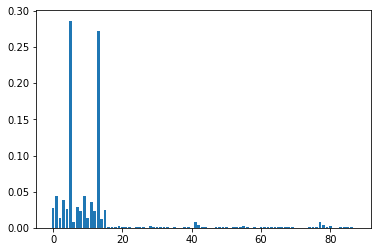

In [210]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# get importance
importance = clf.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [212]:
importance

array([2.77999132e-02, 4.44310320e-02, 1.36772069e-02, 3.79444520e-02,
       2.65874494e-02, 2.86639516e-01, 8.50569919e-03, 2.93061046e-02,
       2.28221832e-02, 4.42109200e-02, 1.39791578e-02, 3.51187841e-02,
       2.32186578e-02, 2.73074229e-01, 1.21536040e-02, 2.42655450e-02,
       1.25061326e-03, 1.42173970e-03, 7.73406088e-04, 2.41369498e-03,
       6.08539335e-04, 4.66778379e-04, 6.45454898e-04, 3.74917566e-04,
       9.88578404e-04, 9.47302309e-04, 8.48655466e-04, 3.95839346e-04,
       1.85140461e-03, 4.75369319e-04, 1.42904295e-03, 1.08292507e-03,
       6.23165246e-04, 1.24441421e-03, 2.09435790e-04, 6.35368337e-04,
       3.63202162e-04, 2.34312380e-04, 4.93188230e-04, 1.08195410e-03,
       3.94872494e-04, 8.05928152e-03, 3.35248657e-03, 5.20195967e-04,
       1.57488185e-03, 3.96388202e-04, 9.64364806e-05, 5.95355286e-04,
       5.07011566e-04, 1.08032321e-03, 5.98592986e-04, 3.74144725e-04,
       1.25524650e-03, 1.35417758e-03, 5.45755389e-04, 2.19063844e-03,
      

In [220]:
importance_DF=pd.DataFrame([[x for x in range(len(importance))],importance]).T
# pd.DataFrame(data,columns=['episode','scene','character','sentence'])

In [229]:
importance_DF_sort=importance_DF.sort_values(ascending=[False], by=[1])[:10]
importance_DF_sort['label']=importance_DF_sort[0].apply(lambda x: poke_training.drop(['label'],axis=1).columns[x])

In [239]:
importance_DF_sort.columns=['idx','importance','label']
importance_DF_sort

,idx,importance,label
5,5.0,0.286640,one_speed
13,13.0,0.273074,two_Speed
1,1.0,0.044431,one_Attack
9,9.0,0.044211,two_Attack
3,3.0,0.037944,one_SPAtk
11,11.0,0.035119,two_Sp. Atk
7,7.0,0.029306,one_attack_over_defense
0,0.0,0.027800,one_HP
4,4.0,0.026587,one_SPDef
15,15.0,0.024266,two_attack_over_defense


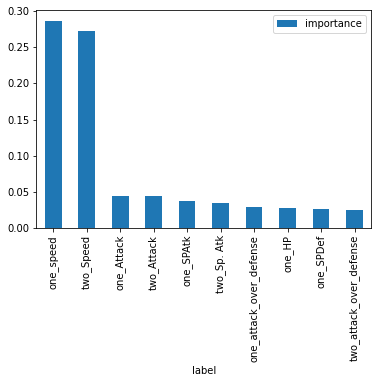

In [244]:
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()
ax = importance_DF_sort.plot.bar(x='label', y='importance', rot=0)
plt.xticks(rotation=90)
plt.show()

# ax1.barh(y=range(len(x_data)), width=y_data2, label='average page view at second period (mean2)', color='#0041FF', alpha=0.8, height=bar_width)

(5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

In [263]:
combat_total=pd.concat([combats['First_pokemon'],combats['Second_pokemon']]).value_counts()
combat_total=combat_total.to_frame().reset_index()
combat_total

,index,0
0,163,164
1,344,160
2,667,159
3,214,158
4,758,158
...,...,...
779,605,99
780,122,98
781,263,97
782,112,95


In [264]:
winner_total=combats['Winner'].value_counts()
winner_total=winner_total.to_frame().reset_index()

In [265]:
winner_total

,index,Winner
0,163,152
1,154,136
2,438,136
3,428,134
4,432,133
...,...,...
778,189,5
779,237,4
780,639,4
781,190,3


In [282]:
# winner_total.to_frame().merge(combat_total.to_frame(),)

merge_combat=pd.merge(winner_total,combat_total,how='inner',on=["index"],right_index=True)

In [283]:
merge_combat.columns=['pid','win_num','combat_num']
merge_combat

,pid,win_num,combat_num
0,163,152,164
1,154,136,141
2,438,136,149
3,428,134,153
4,432,133,145
...,...,...,...
778,189,5,115
779,237,4,123
780,639,4,129
781,190,3,122


In [284]:
merge_combat['combat_ratio']=merge_combat['win_num']/merge_combat['combat_num']

In [285]:
merge_combat=merge_combat.sort_values(ascending=[False], by=['combat_ratio'])
merge_combat

,pid,win_num,combat_num,combat_ratio
9,155,127,129,0.984496
43,513,116,119,0.974790
22,704,121,125,0.968000
48,20,115,119,0.966387
1,154,136,141,0.964539
...,...,...,...,...
777,577,5,128,0.039062
779,237,4,123,0.032520
780,639,4,129,0.031008
781,190,3,122,0.024590


In [286]:
pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [288]:
merge_combat=pd.merge(merge_combat,pokemon,how='inner',on=["pid"],right_index=True)

In [289]:
merge_combat

,pid,win_num,combat_num,combat_ratio,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,155,127,129,0.984496,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
43,513,116,119,0.974790,Weavile,Dark,Ice,70,120,65,45,85,125,False
22,704,121,125,0.968000,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True
48,20,115,119,0.966387,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
1,154,136,141,0.964539,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,577,5,128,0.039062,Munna,Psychic,NaN,76,25,45,67,55,24,False
779,237,4,123,0.032520,Slugma,Fire,NaN,40,40,40,70,40,20,False
780,639,4,129,0.031008,Solosis,Psychic,NaN,45,30,40,105,50,20,False
781,190,3,122,0.024590,Togepi,Fairy,NaN,35,20,65,40,65,20,False


In [290]:
merge_combat[:10]

,pid,win_num,combat_num,combat_ratio,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,155,127,129,0.984496,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
43,513,116,119,0.974790,Weavile,Dark,Ice,70,120,65,45,85,125,False
22,704,121,125,0.968000,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True
48,20,115,119,0.966387,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
1,154,136,141,0.964539,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
14,477,124,129,0.961240,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
19,727,122,127,0.960630,Greninja,Water,Dark,72,95,67,103,71,122,False
35,717,118,123,0.959350,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
33,165,119,125,0.952000,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
58,350,114,120,0.950000,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False


 A simple method for identifying the strongest Pokémon using this graph is to compute the matrix A = G + G2. Consider a given row of A; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.

In [291]:
combats[]

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [294]:
pokemon['pid']

0        1
1        2
2        3
3        4
4        5
      ... 
795    796
796    797
797    798
798    799
799    800
Name: pid, Length: 800, dtype: int64

In [308]:
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [314]:
combats_dorminance=combats.copy()
combats_dorminance['dorminance']=combats_dorminance['Winner']-combats_dorminance['First_pokemon']
combats_dorminance['dorminance']=combats_dorminance['dorminance'].apply(lambda x: 1 if x==0 else -1)
combats_dorminance

,First_pokemon,Second_pokemon,Winner,dorminance
0,266,298,298,-1
1,702,701,701,-1
2,191,668,668,-1
3,237,683,683,-1
4,151,231,151,1
...,...,...,...,...
49995,707,126,707,1
49996,589,664,589,1
49997,303,368,368,-1
49998,109,89,109,1


In [316]:
id1=266
id2=298
combats_dorminance[((combats_dorminance['First_pokemon']==id1)&(combats_dorminance['Second_pokemon']==id2) |(combats_dorminance['First_pokemon']==id2)&(combats_dorminance['Second_pokemon']==id1))]['dorminance'].sum()<0

,First_pokemon,Second_pokemon,Winner,dorminance
0,266,298,298,-1


In [318]:
def compare_dorminance(id1,id2):
#     combats[(combats['First_pokemon']==id1&combats['Second_pokemon']==id2)|(combats['First_pokemon']==id2&combats['Second_pokemon']==id1)]
    if(combats_dorminance[((combats_dorminance['First_pokemon']==id1)&(combats_dorminance['Second_pokemon']==id2) |(combats_dorminance['First_pokemon']==id2)&(combats_dorminance['Second_pokemon']==id1))]['dorminance'].sum()<0):
        return 0
    else:
        return 1

In [295]:
matrix = [[0 for i in range(800)] for j in range(800)]

In [321]:
for pid1 in pokemon['pid']:
    for pid2 in pokemon['pid']:
        matrix[pid1-1][pid2-1]=compare_dorminance(pid1,pid2)
    print(pid1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [326]:

array=np.array(matrix)

In [328]:
from networkx import from_numpy_array
g_pokemen = from_numpy_array(array)

In [332]:
np.sum(array,axis=1)

array([727, 745, 740, 749, 750, 743, 731, 737, 743, 745, 732, 800, 729,
       753, 733, 738, 747, 738, 752, 752, 744, 747, 742, 739, 737, 734,
       737, 736, 748, 736, 737, 732, 800, 748, 740, 736, 743, 729, 740,
       729, 731, 748, 728, 746, 747, 800, 739, 742, 744, 732, 740, 739,
       725, 730, 733, 734, 749, 727, 740, 724, 747, 736, 744, 747, 742,
       800, 738, 736, 745, 730, 745, 753, 737, 741, 742, 744, 752, 800,
       737, 746, 736, 738, 733, 743, 746, 747, 743, 752, 725, 800, 746,
       738, 734, 744, 732, 719, 741, 744, 740, 730, 741, 751, 748, 743,
       738, 749, 731, 746, 740, 745, 732, 755, 739, 736, 740, 737, 743,
       735, 730, 740, 743, 764, 744, 742, 737, 737, 739, 752, 755, 727,
       737, 739, 747, 735, 736, 743, 735, 747, 740, 737, 747, 744, 741,
       800, 752, 739, 738, 737, 738, 734, 732, 743, 740, 732, 741, 742,
       740, 742, 730, 742, 749, 737, 733, 748, 732, 743, 751, 754, 744,
       741, 733, 744, 735, 738, 752, 743, 734, 750, 732, 738, 73

In [329]:
g_pokemen

In [333]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')

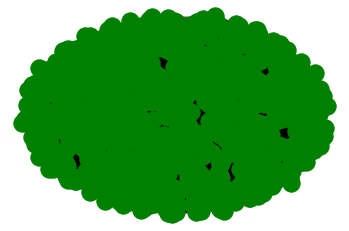

In [336]:
visualize_graph(g_pokemen, False, k=0.1, alpha=0.4)

In [341]:
combats_dorminance[:1]['First_pokemon'][0]

266